In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [6]:
df = pd.read_csv("Twitter_Data.csv")
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [7]:
print(df.columns)


Index(['clean_text', 'category'], dtype='object')


In [12]:
df.dtypes


clean_text     object
category      float64
dtype: object

In [13]:
df['category'].unique()


array([-1.,  0.,  1., nan])

In [14]:
df = df.rename(columns={'clean_text': 'Text', 'category': 'Sentiment'})


In [15]:
df['Sentiment'].unique()


array([-1.,  0.,  1., nan])

In [16]:
df.isnull().sum()


Text         4
Sentiment    7
dtype: int64

In [17]:
df = df.dropna()


In [18]:
df.isnull().sum()


Text         0
Sentiment    0
dtype: int64

In [19]:
df['Sentiment'].value_counts()


Sentiment
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64

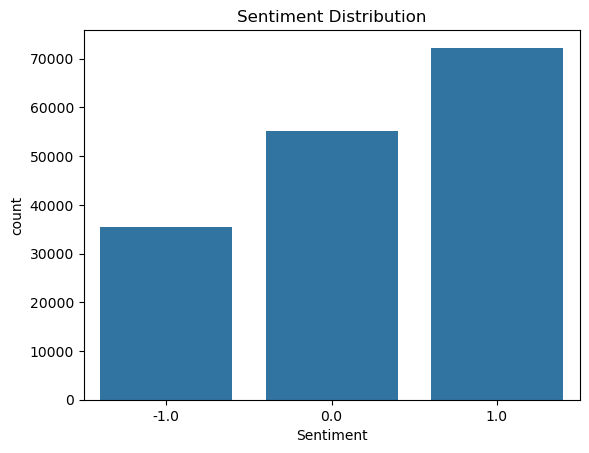

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Distribution")
plt.show()


In [21]:
import re

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Text']).toarray()
y = df['Sentiment']


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Text'])  # no .toarray()

y = df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = LogisticRegression(max_iter=200)  # or 300, 500
model.fit(X_train, y_train)



LogisticRegression(max_iter=200)

In [30]:
model = LogisticRegression(solver='saga', max_iter=500)
model.fit(X_train, y_train)


LogisticRegression(max_iter=500, solver='saga')

In [31]:
sample_text = ["The product was terrible and I hated it."]
sample_vector = tfidf.transform(sample_text)
prediction = model.predict(sample_vector)
print("Predicted Sentiment:", prediction[0])


Predicted Sentiment: -1.0


In [32]:
import joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [33]:
model = joblib.load('sentiment_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')
